<a href="https://colab.research.google.com/github/patime07/Machine-Learning-Projects/blob/main/Time_series_Bankathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install requests pandas

In [60]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [61]:
path = "/content/FXRATEMAA618NUPN (1).csv"
df = pd.read_csv(path)

In [62]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE']

,DATE
0,1950-01-01
1,1951-01-01
2,1952-01-01
3,1953-01-01
4,1954-01-01
...,...
56,2006-01-01
57,2007-01-01
58,2008-01-01
59,2009-01-01


In [63]:
df.head()

,DATE,FXRATEMAA618NUPN
0,1950-01-01,3.499340
1,1951-01-01,3.500339
2,1952-01-01,3.500339
3,1953-01-01,3.499340
4,1954-01-01,3.501339


In [64]:
# Renaming the column from 'FXRATEMAA618NUPN' to 'Rate'
df.rename(columns={'FXRATEMAA618NUPN': 'RATE'}, inplace=True)

In [65]:
df.head()

,DATE,RATE
0,1950-01-01,3.499340
1,1951-01-01,3.500339
2,1952-01-01,3.500339
3,1953-01-01,3.499340
4,1954-01-01,3.501339


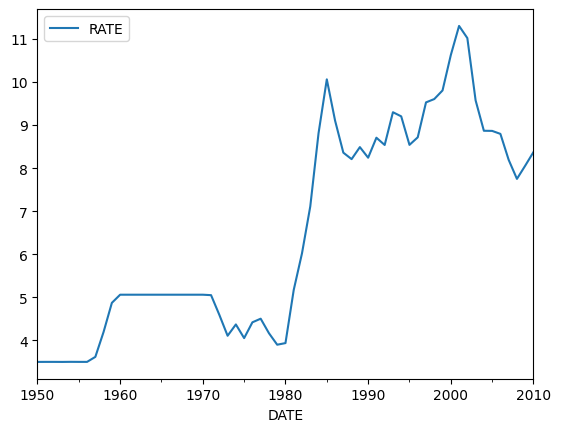

In [66]:
#plot the df
df.plot(x='DATE', y='RATE', kind='line')
plt.show()

In [68]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Convert the 'DATE' column to datetime and set it as the index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


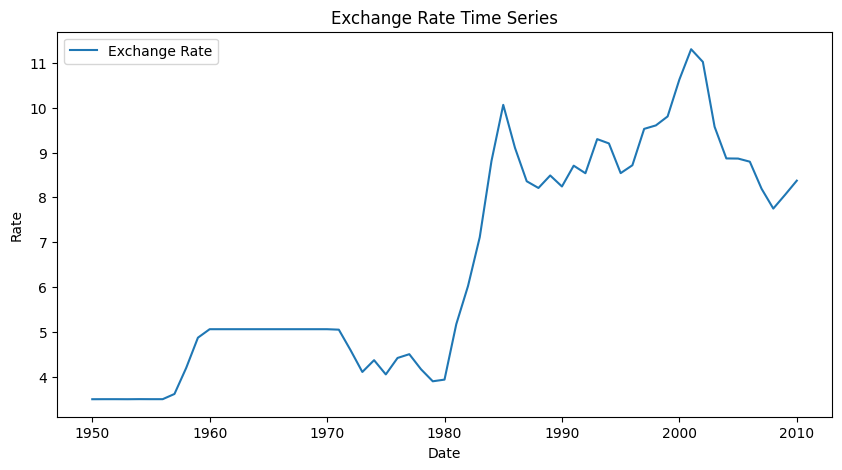

{'ADF Statistic': -1.353319095681153,
 'p-value': 0.604439855426018,
 'Critical Values': {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944}}

In [69]:

# Plot the time series to visualize the data
plt.figure(figsize=(10, 5))
plt.plot(df['RATE'], label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(df['RATE'])
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4]
}

adf_result

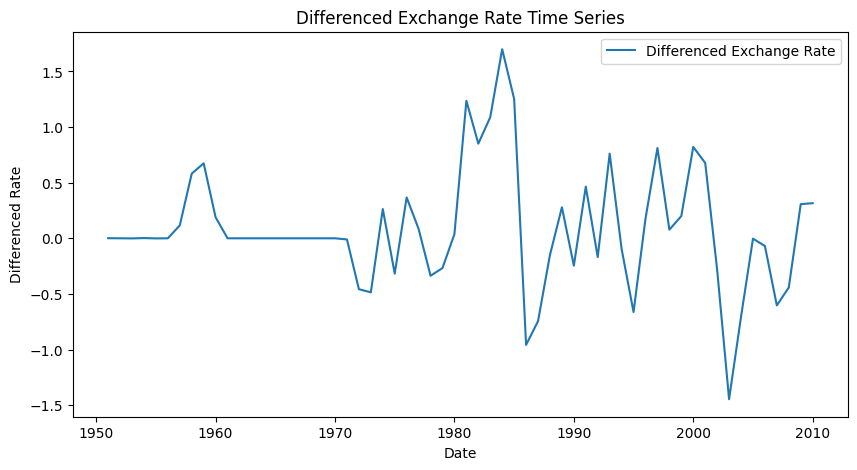

{'ADF Statistic': -5.135323007256132,
 'p-value': 1.1898592656745718e-05,
 'Critical Values': {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944}}

In [71]:
# Apply first-order differencing to make the series stationary
data_diff = df['RATE'].diff().dropna()

# Perform the Augmented Dickey-Fuller test on the differenced data
adf_test_diff = adfuller(data_diff)
adf_result_diff = {
    'ADF Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Critical Values': adf_test_diff[4]
}

# Plot the differenced series
plt.figure(figsize=(10, 5))
plt.plot(data_diff, label='Differenced Exchange Rate')
plt.title('Differenced Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Rate')
plt.legend()
plt.show()

adf_result_diff


In [73]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range of p, d, q values to test
p = d = q = range(0, 3)
pdq_combinations = list(itertools.product(p, d, q))

# Evaluate ARIMA models and select the one with the lowest AIC
best_aic = float("inf")
best_pdq = None

for pdq in pdq_combinations:
    try:
        model = ARIMA(df['RATE'], order=pdq)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = pdq
    except:
        continue

best_pdq, best_aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

((0, 1, 1), 85.31806926396128)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


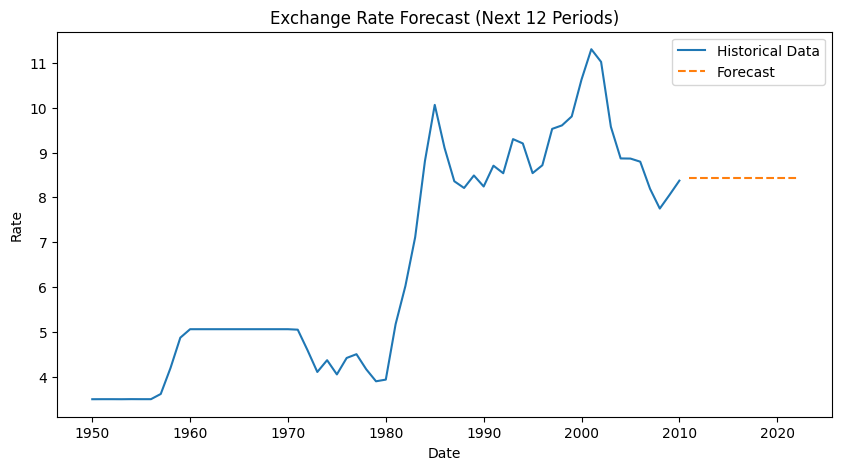

,predicted_mean
2011-01-01,8.433819
2012-01-01,8.433819
2013-01-01,8.433819
2014-01-01,8.433819
2015-01-01,8.433819
2016-01-01,8.433819
2017-01-01,8.433819
2018-01-01,8.433819
2019-01-01,8.433819
2020-01-01,8.433819


In [74]:
# Fit the ARIMA model with the selected parameters
model = ARIMA(df['RATE'], order=(0, 1, 1))
model_fit = model.fit()

# Forecast the next 12 time periods (1 year, assuming the data is annual)
forecast = model_fit.forecast(steps=12)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['RATE'], label='Historical Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exchange Rate Forecast (Next 12 Periods)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

forecast
